<a href="https://colab.research.google.com/github/ORAzzQWQ/NLP_2024/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part I: Data Pre-processing

In [ ]:
import pandas as pd

In [ ]:
# Download the Google Analogy dataset
!wget http://download.tensorflow.org/data/questions-words.txt

--2024-09-19 14:17:13--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.202.207, 173.194.203.207, 74.125.199.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.202.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.003s  

2024-09-19 14:17:14 (201 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [ ]:
# Preprocess the dataset
file_name = "questions-words"
with open(f"{file_name}.txt", "r") as f:
    data = f.read().splitlines()

In [ ]:
# check data from the first 10 entries
for entry in data[:10]:
    print(entry)

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [ ]:
# TODO1: Write your code here for processing data to pd.DataFrame
# Please note that the first five mentions of ": " indicate `semantic`,
# and the remaining nine belong to the `syntatic` category.

questions = []
categories = []
sub_categories = []
colon_count = 0

for line in data:
    line = line.strip()

    if line.startswith(":"):
        colon_count += 1
        section_name = line
        continue

    if colon_count <= 5:
        categories.append("semantic")
    else:
        categories.append("syntatic")

    sub_categories.append(section_name)
    questions.append(line)

In [ ]:
# Create the dataframe
df = pd.DataFrame(
    {
        "Question": questions,
        "Category": categories,
        "SubCategory": sub_categories,
    }
)
print(df)

                             Question  Category                 SubCategory
0          Athens Greece Baghdad Iraq  semantic  : capital-common-countries
1      Athens Greece Bangkok Thailand  semantic  : capital-common-countries
2         Athens Greece Beijing China  semantic  : capital-common-countries
3        Athens Greece Berlin Germany  semantic  : capital-common-countries
4      Athens Greece Bern Switzerland  semantic  : capital-common-countries
...                               ...       ...                         ...
19539         write writes talk talks  syntatic        : gram9-plural-verbs
19540       write writes think thinks  syntatic        : gram9-plural-verbs
19541    write writes vanish vanishes  syntatic        : gram9-plural-verbs
19542         write writes walk walks  syntatic        : gram9-plural-verbs
19543         write writes work works  syntatic        : gram9-plural-verbs

[19544 rows x 3 columns]


In [ ]:
df.head()

,Question,Category,SubCategory
0,Athens Greece Baghdad Iraq,semantic,: capital-common-countries
1,Athens Greece Bangkok Thailand,semantic,: capital-common-countries
2,Athens Greece Beijing China,semantic,: capital-common-countries
3,Athens Greece Berlin Germany,semantic,: capital-common-countries
4,Athens Greece Bern Switzerland,semantic,: capital-common-countries


In [ ]:
df.to_csv(f"{file_name}.csv", index=False)

## Part II: Use pre-trained word embeddings
- After finish Part I, you can run Part II code blocks only.

In [ ]:
import pandas as pd
import numpy as np
import gensim.downloader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
data = pd.read_csv("questions-words.csv")

In [ ]:
MODEL_NAME = "glove-wiki-gigaword-100"
# You can try other models.
# https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models

# Load the pre-trained model (using GloVe vectors here)
model = gensim.downloader.load(MODEL_NAME)
print("The Gensim model loaded successfully!")

[==================================================] 100.0% 128.1/128.1MB downloaded
The Gensim model loaded successfully!


In [ ]:
# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

for analogy in tqdm(data["Question"]):
      # TODO2: Write your code here to use pre-trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      # tqdm(): show the processing line
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """
      # ask ChatGPT how to use
      word_a, word_b, word_c, gold_answer = analogy.split()

      try:
        result_vector = model[word_b] + model[word_c] - model[word_a]

        predicted_word = model.most_similar(positive=[result_vector], topn=1)[0][0]

        preds.append(predicted_word)
        golds.append(gold_answer)

      except KeyError as e:
        # print(f"Word not in vocabulary: {e}")
        preds.append(None)
        golds.append(gold_answer)


100%|██████████| 19544/19544 [02:55<00:00, 111.17it/s]


In [ ]:
# Perform evaluations. You do not need to modify this block!!

def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)
data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data["Category"].unique():
    mask = data["Category"] == category
    golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100}%")

# Evaluation: sub-categories
for sub_category in data["SubCategory"].unique():
    mask = data["SubCategory"] == sub_category
    golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category{sub_category}, Accuracy: {acc_subcat * 100}%")

Category: semantic, Accuracy: 2.2663208929980834%
Category: syntatic, Accuracy: 14.341920374707259%
Sub-Category: capital-common-countries, Accuracy: 0.0%
Sub-Category: capital-world, Accuracy: 0.0%
Sub-Category: currency, Accuracy: 0.0%
Sub-Category: city-in-state, Accuracy: 0.0%
Sub-Category: family, Accuracy: 39.723320158102766%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 6.048387096774194%
Sub-Category: gram2-opposite, Accuracy: 6.280788177339902%
Sub-Category: gram3-comparative, Accuracy: 30.705705705705704%
Sub-Category: gram4-superlative, Accuracy: 25.49019607843137%
Sub-Category: gram5-present-participle, Accuracy: 13.446969696969695%
Sub-Category: gram6-nationality-adjective, Accuracy: 0.0%
Sub-Category: gram7-past-tense, Accuracy: 11.346153846153847%
Sub-Category: gram8-plural, Accuracy: 15.54054054054054%
Sub-Category: gram9-plural-verbs, Accuracy: 22.873563218390807%


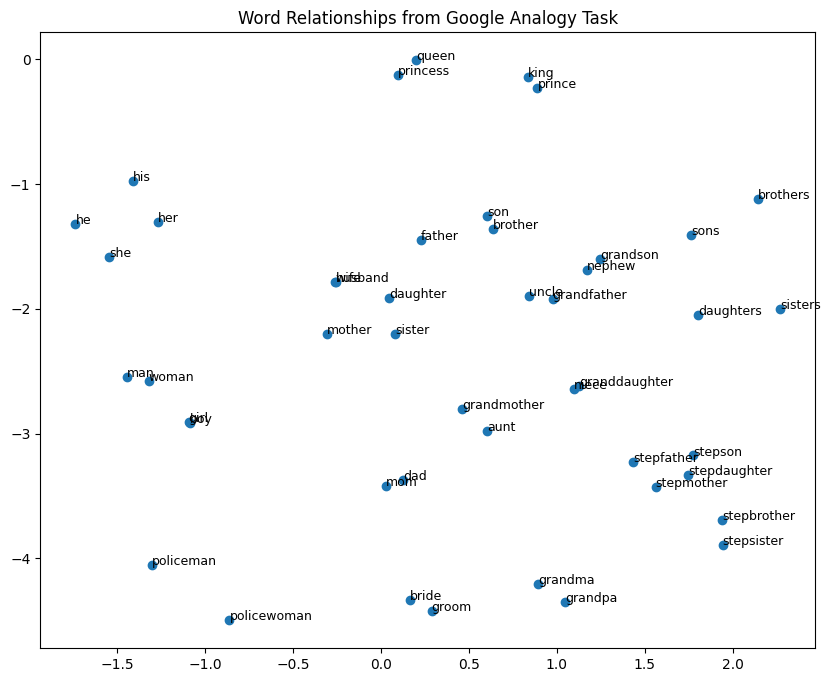

<Figure size 640x480 with 0 Axes>

In [ ]:
# Collect words from Google Analogy dataset
SUB_CATEGORY = ": family"

# TODO3: Plot t-SNE for the words in the SUB_CATEGORY `: family`
# ask ChatGPT how to use
family_words = data[data["SubCategory"] == ": family"]["Question"].str.split().tolist()
family_words = [word for sublist in family_words for word in sublist]
family_words = list(set(family_words))

words_vectors = []
words = []
for word in family_words:
    if word in model:
        words_vectors.append(model[word])
        words.append(word)

words_vectors = np.array(words_vectors)
tsne = TSNE(n_components=2, random_state=0)
reduced_vectors = tsne.fit_transform(words_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

# add tag
for i, word in enumerate(words):
    plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], word, fontsize=9)

plt.title("Word Relationships from Google Analogy Task")
plt.show()
plt.savefig("word_relationships.png", bbox_inches="tight")

### Part III: Train your own word embeddings

### Get the latest English Wikipedia articles and do sampling.
- Usually, we start from Wikipedia dump (https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2). However, the downloading step will take very long. Also, the cleaning step for the Wikipedia corpus ([`gensim.corpora.wikicorpus.WikiCorpus`](https://radimrehurek.com/gensim/corpora/wikicorpus.html#gensim.corpora.wikicorpus.WikiCorpus)) will take much time. Therefore, we provide cleaned files for you.

In [ ]:
# Download the split Wikipedia files
# Each file contain 562365 lines (articles).
!gdown --id 1jiu9E1NalT2Y8EIuWNa1xf2Tw1f1XuGd -O wiki_texts_part_0.txt.gz
!gdown --id 1ABblLRd9HXdXvaNv8H9fFq984bhnowoG -O wiki_texts_part_1.txt.gz
!gdown --id 1z2VFNhpPvCejTP5zyejzKj5YjI_Bn42M -O wiki_texts_part_2.txt.gz
!gdown --id 1VKjded9BxADRhIoCzXy_W8uzVOTWIf0g -O wiki_texts_part_3.txt.gz
!gdown --id 16mBeG26m9LzHXdPe8UrijUIc6sHxhknz -O wiki_texts_part_4.txt.gz

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1jiu9E1NalT2Y8EIuWNa1xf2Tw1f1XuGd

but Gdown can't. Please check connections and permissions.
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warn

In [ ]:
# Download the split Wikipedia files
# Each file contain 562365 lines (articles), except the last file.
!gdown --id 17JFvxOH-kc-VmvGkhG7p3iSZSpsWdgJI -O wiki_texts_part_5.txt.gz
!gdown --id 19IvB2vOJRGlrYulnTXlZECR8zT5v550P -O wiki_texts_part_6.txt.gz
!gdown --id 1sjwO8A2SDOKruv6-8NEq7pEIuQ50ygVV -O wiki_texts_part_7.txt.gz
!gdown --id 1s7xKWJmyk98Jbq6Fi1scrHy7fr_ellUX -O wiki_texts_part_8.txt.gz
!gdown --id 17eQXcrvY1cfpKelLbP2BhQKrljnFNykr -O wiki_texts_part_9.txt.gz
!gdown --id 1J5TAN6bNBiSgTIYiPwzmABvGhAF58h62 -O wiki_texts_part_10.txt.gz

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=17JFvxOH-kc-VmvGkhG7p3iSZSpsWdgJI

but Gdown can't. Please check connections and permissions.
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warn

In [ ]:
# Extract the downloaded wiki_texts_parts files.
# -k : save origin file !gunzip -k wiki_texts_part_*.gz
!gunzip wiki_texts_part_*.gz

In [ ]:
# Combine the extracted wiki_texts_parts files.
!cat wiki_texts_part_*.txt > wiki_texts_combined.txt

In [ ]:
# Check the first ten lines of the combined file
!head -n 10 wiki_texts_combined.txt

anarchism is political philosophy and movement that is against all forms of authority and seeks to abolish the institutions it claims maintain unnecessary coercion and hierarchy typically including the state and capitalism anarchism advocates for the replacement of the state with stateless societies and voluntary free associations as historically left wing movement this reading of anarchism is placed on the farthest left of the political spectrum usually described as the libertarian wing of the socialist movement libertarian socialism although traces of anarchist ideas are found all throughout history modern anarchism emerged from the enlightenment during the latter half of the th and the first decades of the th century the anarchist movement flourished in most parts of the world and had significant role in workers struggles for emancipation various anarchist schools of thought formed during this period anarchists have taken part in several revolutions most notably in the paris commune

Please note that we used the default parameters of [`gensim.corpora.wikicorpus.WikiCorpus`](https://radimrehurek.com/gensim/corpora/wikicorpus.html#gensim.corpora.wikicorpus.WikiCorpus) for cleaning the Wiki raw file. Thus, words with one character were discarded.

In [ ]:
# use local cpu (ryzen 5 pro)
import gzip
import shutil
import os

# 解压 .gz 文件
def gunzip_file(input_file, output_file):
    with gzip.open(input_file, 'rb') as f_in:
        with open(output_file, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

# 解压所有 .gz 文件
# for i in range(10):
#     input_gz = f"wiki_texts_part_{i}.txt.gz"
#     output_txt = f"wiki_texts_part_{i}.txt"
#     print(f"Unzipping {input_gz}...")
#     gunzip_file(input_gz, output_txt)
#     print(f"{input_gz} unzipped!")

with open('wiki_texts_combined.txt', 'w', encoding='utf-8') as outfile:
    for i in range(11):
        txt_file = f"wiki_texts_part_{i}.txt"
        with open(txt_file, 'r', encoding='utf-8', errors='ignore') as infile:
            outfile.write(infile.read())

print("All text files have been combined into wiki_texts_combined.txt")

# 查看合并文件的前 10 行
with open('wiki_texts_combined.txt', 'r', encoding='utf-8') as combined_file:
    for _ in range(10):
        print(combined_file.readline().strip())

In [ ]:
# Now you need to do sampling because the corpus is too big.
# You can further perform analysis with a greater sampling ratio.

import random

wiki_txt_path = "wiki_texts_combined.txt"
output_path   = "random_text.txt"
# wiki_texts_combined.txt is a text file separated by linebreaks (\n).
# Each row in wiki_texts_combined.txt indicates a Wikipedia article.

with open(wiki_txt_path, "r", encoding="utf-8") as f:
    with open(output_path, "w", encoding="utf-8") as output_file:
    # TODO4: Sample `20%` Wikipedia articles
    # Write your code here (ask claude)
      for line in f:
          if random.random() < 0.1:  # 20%的概率(ask claude：每一行都有獨立的20%機會被選中、不需要一次將所有內容讀入)
              output_file.write(line)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/random_text_20.zip

Archive:  /content/drive/MyDrive/random_text_20.zip
  inflating: random_text_20.txt      


In [ ]:
# TODO5: Train your own word embeddings with the sampled articles
# https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec
# Hint: You should perform some pre-processing before training.
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
from tqdm import tqdm


nltk.download('punkt') # 句子分割
nltk.download('stopwords')
nltk.download('wordnet') # Lemmatization
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)

    #Remove non-English words
    tokens = [token for token in tokens if token.isalpha() and re.match(r'^[a-zA-Z]+$', token)]

    # 移除停用詞

    tokens = [token for token in tokens if token not in stop_words]

    # 移除標點符號
    tokens = [token for token in tokens if token not in string.punctuation]

    # 詞形還原 (Lemmatization)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

input_file = "/content/drive/MyDrive/NLP/random_text_5.txt"
processed_articles = []
all_tokens = []
stop_words = set(stopwords.words('english'))

with open(input_file, "r", encoding="utf-8") as f:
    for line in tqdm(f):
        tokens = preprocess_text(line.strip())
        processed_articles.append(tokens)
        # all_tokens.extend(tokens)

model = Word2Vec(sentences=processed_articles, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec_model.model")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
7839it [02:20, 48.64it/s]

In [ ]:
data = pd.read_csv("questions-words.csv")

In [ ]:
# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

model = Word2Vec.load("word2vec_model.model")

for analogy in tqdm(data["Question"]):
      # TODO6: Write your code here to use your trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """
      word_a, word_b, word_c, gold_answer = analogy.split()

      try:
        result_vector = model[word_b] + model[word_c] - model[word_a]

        predicted_word = model.most_similar(positive=[result_vector], topn=1)[0][0]

        preds.append(predicted_word)
        golds.append(gold_answer)

      except KeyError as e:
        # print(f"Word not in vocabulary: {e}")
        preds.append(None)
        golds.append(gold_answer)

In [ ]:
# Collect words from Google Analogy dataset
SUB_CATEGORY = ": family"

# TODO7: Plot t-SNE for the words in the SUB_CATEGORY `: family`
family_words = data[data["SubCategory"] == ": family"]["Question"].str.split().tolist()
family_words = [word for sublist in family_words for word in sublist]
family_words = list(set(family_words))

words_vectors = []
words = []
for word in family_words:
    if word in model:
        words_vectors.append(model[word])
        words.append(word)

words_vectors = np.array(words_vectors)
tsne = TSNE(n_components=2, random_state=0)
reduced_vectors = tsne.fit_transform(words_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

# add tag
for i, word in enumerate(words):
    plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], word, fontsize=9)

plt.title("Word Relationships from Google Analogy Task")
plt.show()
plt.savefig("word_relationships.png", bbox_inches="tight")